In [2]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [42]:
train.isnull().sum()

id                                     0
perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3-6_months_late                  0
Count_6-12_months_late                 0
Count_more_than_12_months_late         0
application_underwriting_score      2901
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
premium                                0
target                                 0
dtype: int64

In [41]:
train = train.dropna(subset = ['Count_3-6_months_late'])

In [45]:
df = train.dropna(subset = ['application_underwriting_score'])

In [47]:
df.shape

(76855, 13)

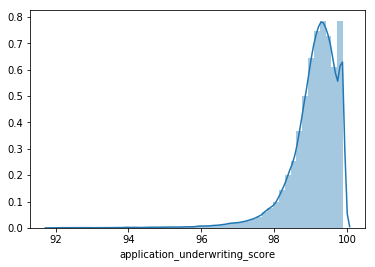

In [46]:
sn.distplot(df['application_underwriting_score'])

In [49]:
train['application_underwriting_score'].fillna(train['application_underwriting_score'].mean(), inplace = True)

In [50]:
train = train.drop('premium', axis = 1)

In [51]:
xtrain = train.drop('target', axis = 1)

In [52]:
xtrain = xtrain.drop('id', axis = 1)
ytrain = train['target']

In [53]:
xtrain.shape

(79756, 10)

In [54]:
ytrain.shape

(79756,)

In [55]:
xtrain_dummies = pd.get_dummies(xtrain)

In [56]:
from sklearn.tree import DecisionTreeClassifier

In [239]:
model = DecisionTreeClassifier(max_depth = 25, min_samples_split = 3 , min_samples_leaf = 2)

In [240]:
model.fit(xtrain_dummies,ytrain )

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=25,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=3,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [241]:
model.score(xtrain_dummies, ytrain)

0.9774813180199609

In [190]:
xtrain_dummies['no_of_premiums_paid'] = train['no_of_premiums_paid']/train['no_of_premiums_paid'].max()

In [181]:
xtrain_dummies['age_in_days'] = train['age_in_days']/train['age_in_days'].max()

In [173]:
xtrain_dummies['Income'] = train['Income']/train['Income'].max()

In [78]:
test = pd.read_csv('test.csv')

In [80]:
test['Count_3-6_months_late'].fillna(0, inplace = True)

In [81]:
test['Count_6-12_months_late'].fillna(0, inplace = True)

In [82]:
test['Count_more_than_12_months_late'].fillna(0, inplace = True)

In [83]:
test['application_underwriting_score'].fillna(test['application_underwriting_score'].mean(), inplace = True)

In [84]:
test.isnull().sum()

id                                  0
perc_premium_paid_by_cash_credit    0
age_in_days                         0
Income                              0
Count_3-6_months_late               0
Count_6-12_months_late              0
Count_more_than_12_months_late      0
application_underwriting_score      0
no_of_premiums_paid                 0
sourcing_channel                    0
residence_area_type                 0
dtype: int64

In [85]:
xtest_dummies = pd.get_dummies(test)

In [87]:
xtest_dummies = xtest_dummies.drop('id', axis = 1)

In [91]:
model.predict(xtest_dummies)

array([1, 1, 1, ..., 1, 1, 1])

In [99]:
ress = pd.DataFrame()

In [189]:
xtest_dummies['no_of_premiums_paid'] = test['no_of_premiums_paid']/test['no_of_premiums_paid'].max()

In [182]:
xtest_dummies['age_in_days'] = test['age_in_days']/test['age_in_days'].max()

In [176]:
xtest_dummies['Income'] = test['Income']/test['Income'].max()

In [242]:
ress['target'] = model.predict(xtest_dummies)

In [243]:
ress['target'].value_counts()

1    30377
0     3847
Name: target, dtype: int64

In [244]:
result = pd.concat([test['id'], ress], axis = 1)

In [245]:
result.to_csv('submit.csv', index = False)